# Red convolucional para clasificacion de tipos de basura
### Proyecto Parte 2
Ruben Gonzalez 20003314

In [1]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


## Creacion de dataset en base a imagenes proporcionadas

In [2]:
def list_dataset():
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

            
# Add class name prefix to each path based on class name include in filename
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df


def class_id_to_label(id):
    label_map = {1: 'glass', 2: 'paper', 3: 'cardboard', 4: 'plastic', 5: 'metal', 6: 'trash'}
    return label_map[id]
    

In [3]:
IMAGES_DIR = '/kaggle/input/garbage-classification/Garbage classification/Garbage classification/'
    
train_file = '/kaggle/input/garbage-classification/one-indexed-files-notrash_train.txt'
val_file   = '/kaggle/input/garbage-classification/one-indexed-files-notrash_val.txt'
test_file  = '/kaggle/input/garbage-classification/one-indexed-files-notrash_test.txt'

df_train = pd.read_csv(train_file, sep=' ', header=None, names=['rel_path', 'label'])
df_valid = pd.read_csv(val_file,   sep=' ', header=None, names=['rel_path', 'label'])
df_test  = pd.read_csv(val_file,   sep=' ', header=None, names=['rel_path', 'label'])

df_train = add_class_name_prefix(df_train, 'rel_path')
df_valid = add_class_name_prefix(df_valid, 'rel_path')
df_test  = add_class_name_prefix(df_test,  'rel_path')

df_train['label'] = df_train['label'].apply(class_id_to_label)
df_valid['label'] = df_valid['label'].apply(class_id_to_label)
df_test['label']  = df_test['label'].apply(class_id_to_label)

print(f'Found {len(df_train)} training, {len(df_valid)} validation and {len(df_test)} samples.')

Found 1768 training, 328 validation and 328 samples.


In [4]:
df_test.head()

,rel_path,label
0,cardboard/cardboard114.jpg,cardboard
1,plastic/plastic204.jpg,plastic
2,glass/glass123.jpg,glass
3,glass/glass152.jpg,glass
4,glass/glass398.jpg,glass


In [5]:
datagen = ImageDataGenerator()

datagen_train = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=IMAGES_DIR,
    x_col='rel_path',
    y_col='label',
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=7,
)

datagen_valid = datagen.flow_from_dataframe(
    dataframe=df_valid,
    directory=IMAGES_DIR,
    x_col='rel_path',
    y_col='label',
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=7,
)

Found 1768 validated image filenames belonging to 6 classes.
Found 328 validated image filenames belonging to 6 classes.


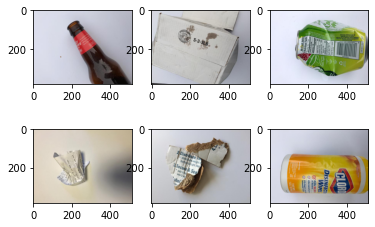

In [6]:
for i, img_path in enumerate(df_train.rel_path.sample(n=6, random_state=7)):
    img = load_img(IMAGES_DIR+img_path)
    img = img_to_array(img, dtype=np.uint8)
    
    #plt.figure(figsize = (5,5))
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

# Resumen de modelos

## Long short term Memory
s una arquitectura de red neuronal recurrente artificial (RNN) utilizada en el campo del aprendizaje profundo . A diferencia de las redes neuronales de retroalimentación estándar , LSTM tiene conexiones de retroalimentación que la convierten en una "computadora de propósito general" (es decir, puede calcular cualquier cosa que una máquina de Turing pueda). No solo puede procesar puntos de datos individuales (como imágenes), sino también secuencias completas de datos (como voz o video). Una unidad LSTM común se compone de una celda , una puerta de entrada , una puerta de salida y una puerta de olvido . La celda recuerda valores en intervalos de tiempo arbitrarios y las tres puertas regulan el flujo de información dentro y fuera de la celda.

## GRU
Propone un novedoso modelo llamado RNN Encoder-Decoder que consiste en 2 redes neuronales recurrentes. La primera de estas codifica una secuencia de simbolos en un vector de representacion y la otra decodifica la representacion en otra secuencia de simbolos. Se entrenan de manera conjunta para maximizar la probabilidad condicional de una secuencia dada una secuencia usada como fuente. El rendimiento de un sistema de traduccion estadistica esta fundamentado en mejorar mediante la utilizacion de probabilidades condicionales de un conjunto de frases computadas por la RNN Encoder-Decoder como caracteristica adicional en el actual modelo log-lineal. Cualitativamente se muestra que el modelo propuesto aprende una semantica y sintactica representacion de frases linguisticas.

## Style transfer
Es un algoritmo utilizado para agregar a cierta imagen un estilo o diseño parecido al de las imagenes que le alimentaron.

## Mask R-CNN
Es un framework  simple y flexible para segmentacion de instancias. El enfoque utilizado eficientiza la deteccion de objetos en una imagen mientra crea de manera simultanea mascaras de segmentacion de alta calidad. Este metodo extiende Faster R-CNN aggregandole un componente para en paralelo crear una mascara que contenga las cajas utilizadas para identificacion de objetos. 

## Retina NET
Consiste en una simple y unificada red compuesta por una red de backbone y dos subredes enfocadas a tareas especificas. El backbone es responsable de procesar un feature map convolucional sobre las imagenes de entrada.

## Faster R-CNN
Consiste en una red neuronal convolucional  que se especializa en deteccion de features por regiones de la imagen. Siendo su principal diferenciador con otras redes el hecho de compartir algunas capas convolucionales, reduciendo asi el tiempo para deteccion o clasificacion.

## YOLO
Es una red neuronal usada para deteccion rapida de objetos. Actualmente se encuentra en su version 3. Es un acronimo de "You Only look Once". La gran ventaja y robustes de este metodo es que ha sido entrenado previamente para clasificar y/o detectar un gran numero de objetos y puede ser facilmente configurable para aplicaciones especificas que se necesiten sin afectar en gran manera el rendimiento.

## Inception
Es un tipo de red neuronal convolucional surgida a partir del visual recognition challenge del 2014. Se centra en un mejor aprovechamiento de los recursos computacionales dentro de la red. Esto lo logra a travez de un minucioso diseño que permite incrementar la profundidad y peso de la red mientras mantiene la carga computacional constante. Las decisiones de arquitectura estan basadas en el principio de Hebbian y la intuicion  del procesamiento multiescala. Un ejemplo de este modelo es GoogleNet usado para clasificacion y deteccion.

## MobileNet
Es un tipo de arquitectura que utiliza convoluciones separadas de forma inteligente para construir redes neuronales profundas livianas en terminos computacionales. Utiliza 2 hiper parametros globales, la latencia y la precision. 

## U-Net
Es un tipo de modelo para redes neuronales que utiliza mucho el data augmentation para hacer mas eficiente su funcionamiento. La arquitectura consiste en la reduccion del camino para capturar el contexto y un simetrico camino expandido que permite una localizacion precisa.

## DenseNet
Es un modelo propuesto para CNN en el cual cada capa convolucional esta conectada a todas las demas capas convolucionales como entradas, esto brinda mejoras como la reduccion del problema vanishing del gradiente, fortalece la propagacion de features, refuerza la reutilizacion de features y reduce el numero de parametros.

## ResNet
Consiste en un modelo que eficientiza el entrenamiento reformulando las capas como funciones residuales que hacen referencia a las capas de entrada en vez de funciones sin referir. este tipo de redes residuales son mas faciles de optimizar y pueden obtener precisiones considerablemente buenas. 

## VGG
Consiste en un modelo que se fundamenta en evaluar la precision de una red convolucional a medida que su profundidad aumenta y su filtro convolucional es pequeño.


Dado la simplicidad que representa utilizar ResNet50, se usara este modelo en la clasificacion agregandole una capa convolucional al final y una capa oculta seguida de la capa de salida.

## Creando el modelo

In [7]:
def build_model(num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False)

    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False
        
    return model


net = build_model(num_classes=6)

net.compile(optimizer='Adam',
            loss='categorical_crossentropy',
            metrics=[tf.keras.metrics.categorical_accuracy])

net.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________

## Training

In [8]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = net.fit_generator(
    generator=datagen_train,
    validation_data=datagen_valid,
    epochs=30,
    validation_freq=1,
    callbacks=[early_stop]
)

Epoch 1/30
56/56 [==============================] - 13s 231ms/step - loss: 0.9800 - categorical_accuracy: 0.6878 - val_loss: 0.4373 - val_categorical_accuracy: 0.8476
Epoch 2/30
56/56 [==============================] - 9s 164ms/step - loss: 0.3497 - categorical_accuracy: 0.8744 - val_loss: 0.4039 - val_categorical_accuracy: 0.8598
Epoch 3/30
56/56 [==============================] - 9s 163ms/step - loss: 0.2199 - categorical_accuracy: 0.9304 - val_loss: 0.3294 - val_categorical_accuracy: 0.8628
Epoch 4/30
56/56 [==============================] - 9s 156ms/step - loss: 0.1284 - categorical_accuracy: 0.9615 - val_loss: 0.4775 - val_categorical_accuracy: 0.8506
Epoch 5/30
56/56 [==============================] - 9s 159ms/step - loss: 0.0831 - categorical_accuracy: 0.9791 - val_loss: 0.2667 - val_categorical_accuracy: 0.8872
Epoch 6/30
56/56 [==============================] - 9s 157ms/step - loss: 0.0373 - categorical_accuracy: 0.9960 - val_loss: 0.2919 - val_categorical_accuracy: 0.9146
Epo

# Graficando el error y la precision

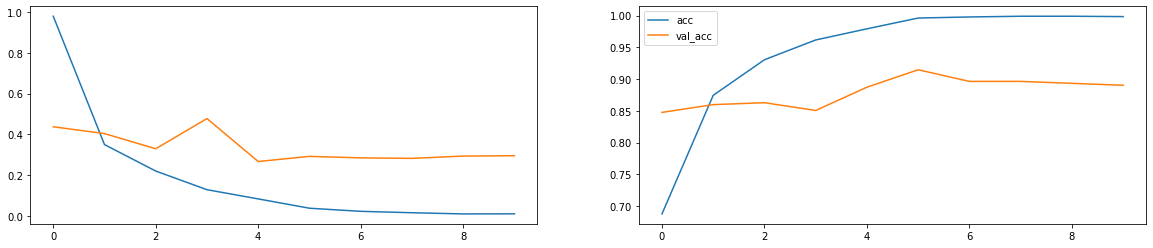

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

axs[0].plot(history.history['loss'], label='loss')
axs[0].plot(history.history['val_loss'], label='val_loss')

axs[1].plot(history.history['categorical_accuracy'], label='acc')
axs[1].plot(history.history['val_categorical_accuracy'], label='val_acc')

plt.legend();
plt.show();

## Guardando el modelo
Dado que ya supero el porcentaje minimo de exactitud solicitada, se procedera a almacenar el modelo

In [10]:
net.save('CNN-Modelo.h5')

## Probando con datos de test y validando error/precision

In [11]:
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=IMAGES_DIR,
    x_col='rel_path',
    y_col='label',
    color_mode="rgb",
    class_mode="categorical",
    batch_size=1,
    shuffle=False,
    seed=7
)

# y_pred = net.predict(test_generator, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

filenames = test_generator.filenames
nb_samples = len(filenames)

metricas = net.evaluate_generator(test_generator, nb_samples)
metricas

Found 328 validated image filenames belonging to 6 classes.


[0.2667330205440521, 0.8871951103210449]

Los valores de Loss y Accuracy mostrados, se observa un accuracy de 0.90 lo cual esta arriba del minimo solicitado

## Resultado de pruebas realizadas

In [12]:
#Cargamos nuevamente el modelo realizado
from keras.models import load_model
Salida = load_model('CNN-Modelo.h5')

In [13]:
#Carga de etiquetas del set de test
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [14]:
#Generacion de 16 numeros random de imagenes de prueba
pruebasTest=np.random.randint(0,len(test_generator),16)
pruebasTest

array([241, 320,  28,  36,  54,  74, 210,  29, 300, 102, 216, 222, 159,
       214, 209, 136])

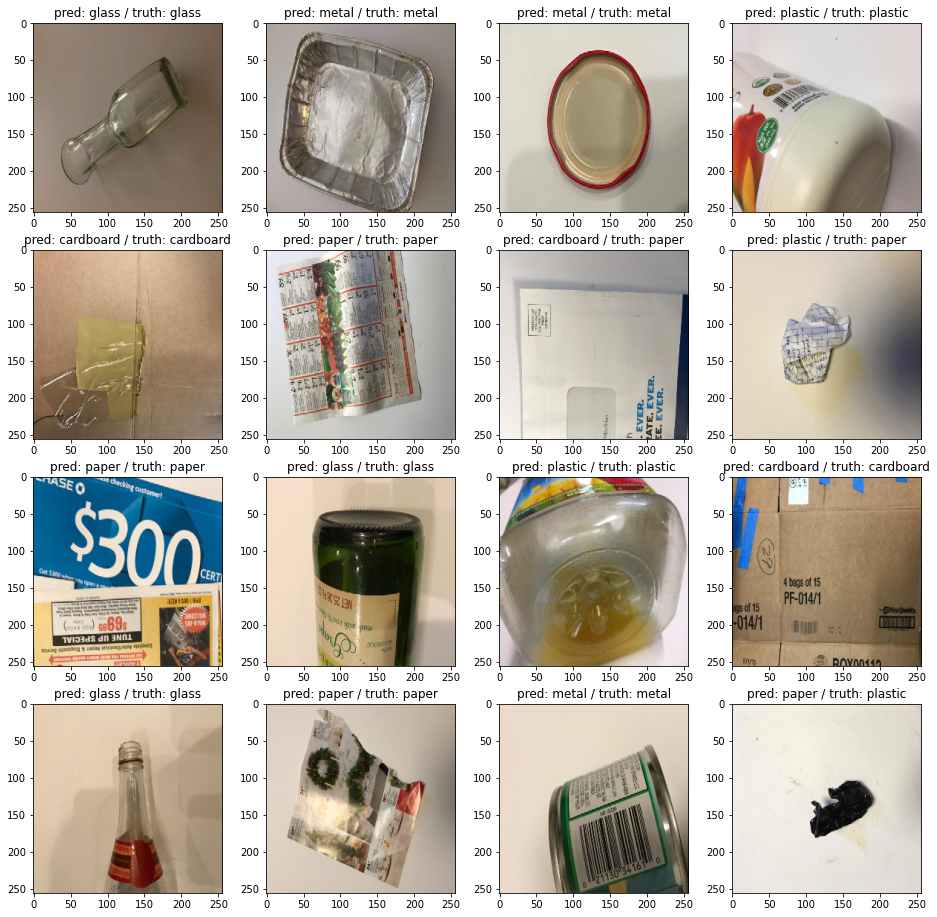

In [15]:
#Mostrar predicciones y clasificacion real
plt.figure(figsize=(16, 16))
for i, img in enumerate(pruebasTest):
    a,b = test_generator.__getitem__(pruebasTest[i])
    PrediceImagen = Salida.predict(a)
    img = array_to_img(a[0])
    plt.subplot(4, 4, i+1)
    plt.title('pred: %s / truth: %s' % (labels[np.argmax(PrediceImagen)], labels[np.argmax(b)]))
    plt.imshow(img)

# Graficando capas de activacion

In [16]:
from keras.preprocessing import image

In [17]:
layer_outputs = [layer.output for layer in Salida.layers[:100]]
test_image = '../input/cnnclasificacionbasura/descarga.jpg'
activation_model = tf.keras.Model(inputs=Salida.input, outputs=layer_outputs)

In [18]:
img = image.load_img(test_image, target_size=(299, 299))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255.

In [19]:
activations = activation_model.predict(img_arr)

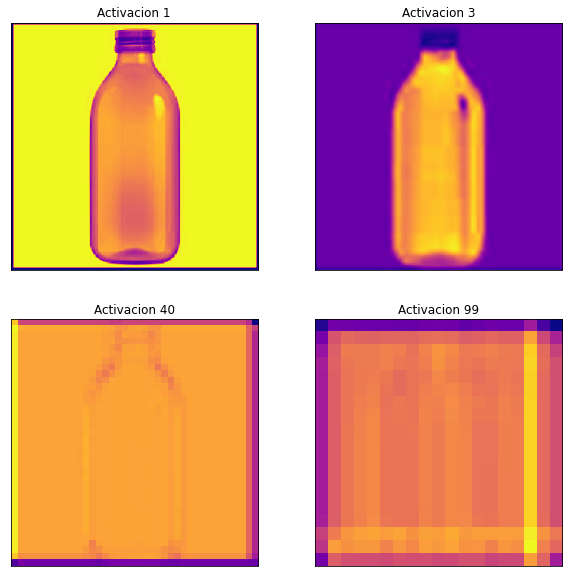

In [20]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1),plt.imshow(activations[1][0, :, :, 1], cmap='plasma')
plt.title('Activacion 1'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(activations[3][0, :, :, 1], cmap='plasma')
plt.title('Activacion 3'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(activations[40][0, :, :, 1], cmap='plasma')
plt.title('Activacion 40'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(activations[99][0, :, :, 1], cmap='plasma')
plt.title('Activacion 99'), plt.xticks([]), plt.yticks([])


plt.show()